In [1]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            '10m_u_component_of_wind',
            '10m_v_component_of_wind',
        ],
        'year': '2015',
        'month': ['01'],
        'day': ['01'],
        'time': ['00:00'],
        'format': 'netcdf',          # download as .nc
        'area': [40, 68, 5, 97],     # ✅ India region
    },
    'wind_10m_india.nc'
)


2025-07-18 19:24:05,570 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-07-18 19:24:06,351 INFO Request ID is 3e2dd12c-e643-497d-a51b-5f0a6cff03f3
2025-07-18 19:24:06,556 INFO status has been updated to accepted
2025-07-18 19:24:15,705 INFO status has been updated to running
2025-07-18 19:24:21,033 INFO status has been updated to successful


3660cfee6ca656ed1427c1445cbcf12a.nc:   0%|          | 0.00/108k [00:00<?, ?B/s]

'wind_10m_india.nc'

In [2]:
import os
os.listdir()



['.anaconda',
 '.cdsapirc',
 '.cdsapirc.txt',
 '.conda',
 '.condarc',
 '.continuum',
 '.gitconfig',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.local',
 '.matplotlib',
 '.virtual_documents',
 '.vscode',
 'anaconda3',
 'anaconda_projects',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{1f7bfd5b-0f86-11f0-b00b-b047e9ee1ce4}.TM.blf',
 'NTUSER.DAT{1f7bfd5b-0f86-11f0-b00b-b047e9ee1ce4}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{1f7bfd5b-0f86-11f0-b00b-b047e9ee1ce4}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'Skill-Swap',
 'Start Menu',
 'Templates',
 'test.nc',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Videos',
 'wind_10m.nc',
 'wind_10m_india.nc']

In [3]:
import xarray as xr

ds = xr.open_dataset("wind_10m.nc")  # use your filename
print(ds)




<xarray.Dataset> Size: 8MB
Dimensions:     (valid_time: 1, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8B 2015-01-01
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      <U4 16B ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 4MB ...
    v10         (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-18T10:14 GRIB to CDM+CF via cfgrib-0.9.1...


<xarray.DataArray (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
array([[[0.15899664, 0.15899664, 0.15899664, ..., 0.15899664,
         0.15899664, 0.15899664],
        [8.725281  , 8.722419  , 8.720924  , ..., 8.716675  ,
         8.7189    , 8.72164   ],
        [8.99075   , 8.989562  , 8.985529  , ..., 8.976627  ,
         8.981953  , 8.986323  ],
        ...,
        [4.413609  , 4.4110746 , 4.408531  , ..., 4.4074664 ,
         4.410318  , 4.412348  ],
        [4.047666  , 4.0463376 , 4.0450425 , ..., 4.044048  ,
         4.0455446 , 4.047076  ],
        [0.40635225, 0.40635225, 0.40635225, ..., 0.40635225,
         0.40635225, 0.40635225]]], dtype=float32)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 8B 2015-01-01
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      <U4 16B '0001'


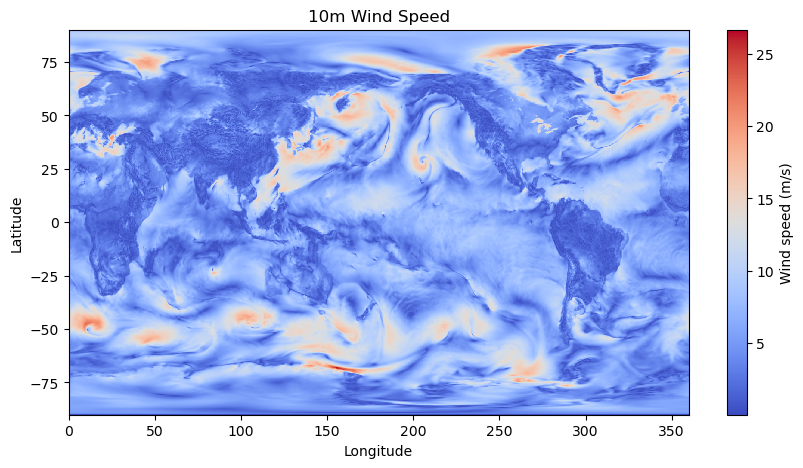

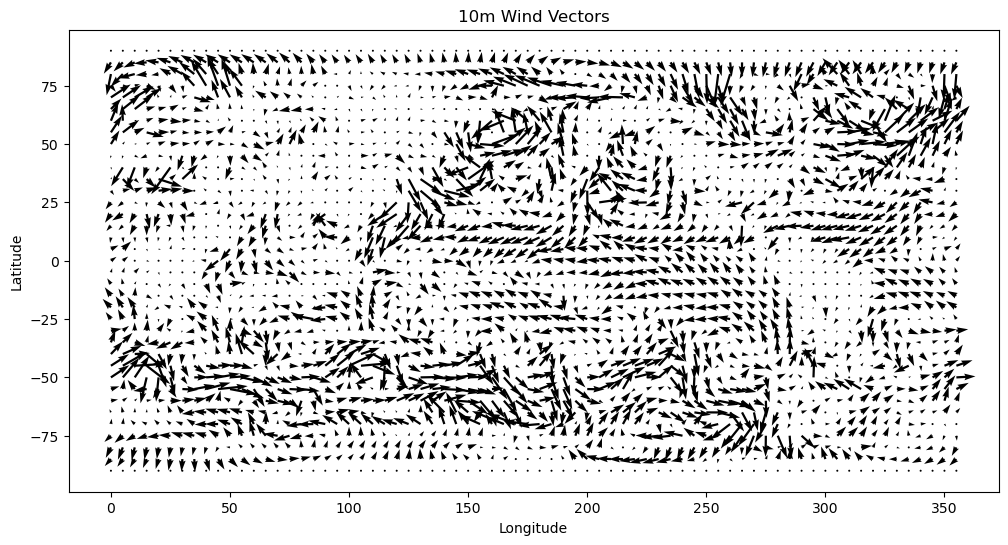

In [4]:
u = ds['u10']
v = ds['v10']
import numpy as np
wind_speed = np.sqrt(u**2 + v**2)
print(wind_speed)
import matplotlib.pyplot as plt

# Select the single time slice (if needed)
ws = wind_speed.squeeze()

plt.figure(figsize=(10,5))
plt.pcolormesh(ds.longitude, ds.latitude, ws, cmap='coolwarm', shading='auto')
plt.colorbar(label='Wind speed (m/s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('10m Wind Speed')
plt.show()

lon = ds.longitude.values
lat = ds.latitude.values
u_plot = u[0, ::20, ::20]  # take every 20th point for clarity
v_plot = v[0, ::20, ::20]

lon_plot = lon[::20]
lat_plot = lat[::20]

plt.figure(figsize=(12,6))
plt.quiver(lon_plot, lat_plot, u_plot, v_plot)
plt.title('10m Wind Vectors')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



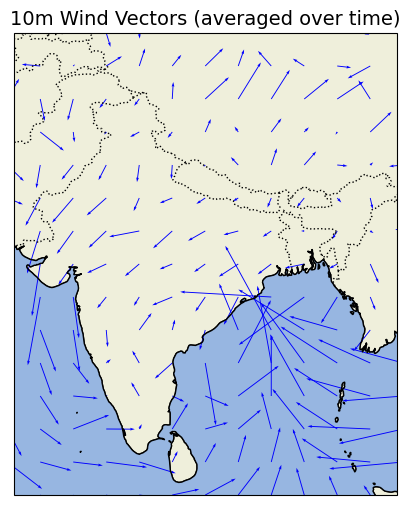

In [8]:
u = ds['u10'].mean(dim='valid_time')  # shape: (latitude, longitude)
v = ds['v10'].mean(dim='valid_time')  # shape: (latitude, longitude)

import numpy as np

lon = ds['longitude'].values
lat = ds['latitude'].values
lon2d, lat2d = np.meshgrid(lon, lat)

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure with PlateCarree projection
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 97, 5, 40], crs=ccrs.PlateCarree())

# Add coastlines and features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=0)

# Plot wind vectors (thin them for clarity)
skip = 10  # adjust to reduce number of arrows
plt.quiver(
    lon2d[::skip, ::skip],
    lat2d[::skip, ::skip],
    u.values[::skip, ::skip],
    v.values[::skip, ::skip],
    transform=ccrs.PlateCarree(),
    color='blue',
    scale=50  # adjust arrow scaling
)

plt.title('10m Wind Vectors (averaged over time)', fontsize=14)
plt.show()


Building network...
✅ Network built with 900 nodes and 3366 edges.
Computing out-closeness with cutoff=3...


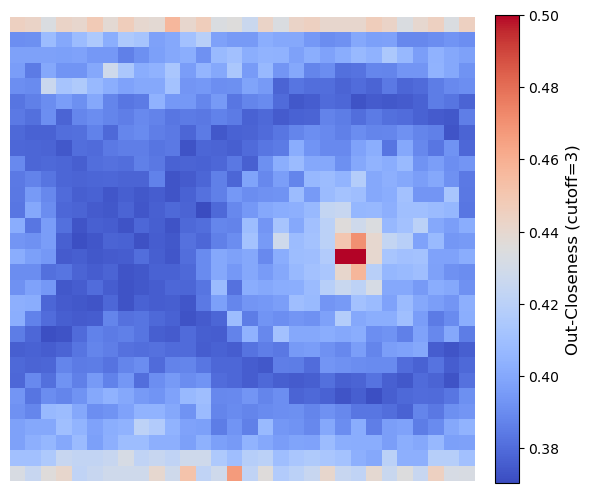

Computing out-closeness with cutoff=5...


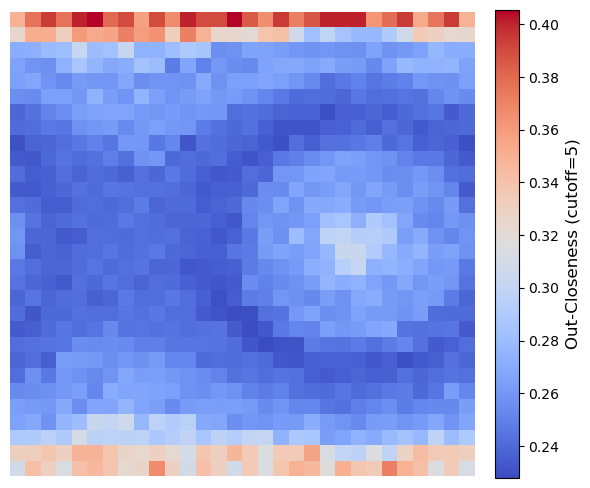

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import TwoSlopeNorm

# =================================
# Driven Vortex Velocity
# =================================
def vortex_velocity(x, y, t, A=8.35, B=-2.55, e=0.2):
    u = A * (1 + e * np.sin(np.pi * t)) * np.cos(y) + B * np.sin(2 * x) * np.cos(y)
    v = -2 * B * np.cos(2 * x) * np.sin(y)
    return u, v

# =================================
# RK4 Step for Trajectory
# =================================
def rk4_step(pos, t, dt):
    x, y = pos
    u1, v1 = vortex_velocity(x, y, t)
    u2, v2 = vortex_velocity(x + 0.5*dt*u1, y + 0.5*dt*v1, t + 0.5*dt)
    u3, v3 = vortex_velocity(x + 0.5*dt*u2, y + 0.5*dt*v2, t + 0.5*dt)
    u4, v4 = vortex_velocity(x + dt*u3, y + dt*v3, t + dt)

    x_new = x + dt * (u1 + 2*u2 + 2*u3 + u4) / 6.0
    y_new = y + dt * (v1 + 2*v2 + 2*v3 + v4) / 6.0

    # periodic boundaries
    x_new = x_new % np.pi
    y_new = y_new % np.pi
    return x_new, y_new

# =================================
# Grid Parameters (lightweight)
# =================================
nx_cells, ny_cells = 30, 30
x_vals = np.linspace(0, np.pi, nx_cells)
y_vals = np.linspace(0, np.pi, ny_cells)
positions = np.vstack([np.meshgrid(x_vals, y_vals)[0].ravel(),
                       np.meshgrid(x_vals, y_vals)[1].ravel()]).T
N = nx_cells * ny_cells

# =================================
# Time Integration
# =================================
dt = 0.05
s = 1.0
steps = int(s / dt)
t0_samples = np.linspace(0, 2.0, 5)

# =================================
# Build Flow Network
# =================================
print("Building network...")
G = nx.DiGraph()
G.add_nodes_from(range(N))

for t0 in t0_samples:
    for i, (x0, y0) in enumerate(positions):
        x, y = x0, y0
        t = t0
        for _ in range(steps):
            x, y = rk4_step((x, y), t, dt)
            t += dt
        xi = int((x / np.pi) * nx_cells) % nx_cells
        yi = int((y / np.pi) * ny_cells) % ny_cells
        j = yi * nx_cells + xi
        G.add_edge(i, j)
print(f"✅ Network built with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# =================================
# Compute & Plot Out-Closeness
# =================================
nrows, ncols = ny_cells, nx_cells
cutoffs = [3, 5]

for cutoff in cutoffs:
    print(f"Computing out-closeness with cutoff={cutoff}...")
    closeness_values = {}
    for node in G.nodes():
        lengths = nx.single_source_shortest_path_length(G, node, cutoff=cutoff)
        if len(lengths) > 1:
            total_dist = sum(d for tgt, d in lengths.items() if tgt != node)
            count = len(lengths) - 1
            closeness = count / total_dist if total_dist > 0 else 0
        else:
            closeness = 0
        closeness_values[node] = closeness

    closeness_grid = np.zeros((nrows, ncols))
    for node, val in closeness_values.items():
        i, j = divmod(node, ncols)
        closeness_grid[i, j] = val

    # ========================
    # Plot (L&D Style)
    # ========================
    plt.figure(figsize=(6,6))
    # symmetric norm around mean
    vmin, vmax = np.min(closeness_grid), np.max(closeness_grid)
    vcenter = (vmin + vmax) / 2
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

    im = plt.imshow(closeness_grid, origin='lower', cmap='coolwarm', norm=norm)

    # remove ticks for clean look
    plt.xticks([]); plt.yticks([])
    # equal aspect ratio
    plt.gca().set_aspect('equal', adjustable='box')

    # add colorbar
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label(f'Out-Closeness (cutoff={cutoff})', fontsize=12)

    # minimal frame
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    plt.show()
